In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline 

In [38]:
data = pd.read_csv('all_owm.csv')


,timestamp,temp,humidity,rain,cloud,visibility,sunrise,sunset,pwr
0,1581958800000,22.00,56.0,0.0,0.0,90.0,1581980000000,1582020000000,0.0
1,1581962400000,21.00,56.0,0.0,0.0,90.0,1581980000000,1582020000000,0.0
2,1581966000000,20.00,60.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0
3,1581969600000,19.00,63.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0
4,1581973200000,19.00,63.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0
...,...,...,...,...,...,...,...,...,...
6163,1604145600000,26.00,88.0,0.0,75.0,100.0,1604100000000,1604140000000,0.0
6164,1604149200000,25.78,88.0,0.0,40.0,100.0,1604100000000,1604140000000,0.0
6165,1604152800000,26.00,83.0,0.0,40.0,100.0,1604100000000,1604140000000,0.0
6166,1604156400000,25.00,88.0,0.0,20.0,100.0,1604100000000,1604140000000,0.0


In [36]:
datetime.fromtimestamp(data.iloc[2][0] // 1000)

datetime.datetime(2020, 2, 18, 2, 0)

In [46]:
data["Dates"] = ""

,timestamp,temp,humidity,rain,cloud,visibility,sunrise,sunset,pwr,datetime
0,1581958800000,22.00,56.0,0.0,0.0,90.0,1581980000000,1582020000000,0.0,
1,1581962400000,21.00,56.0,0.0,0.0,90.0,1581980000000,1582020000000,0.0,
2,1581966000000,20.00,60.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0,
3,1581969600000,19.00,63.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0,
4,1581973200000,19.00,63.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0,
...,...,...,...,...,...,...,...,...,...,...
6163,1604145600000,26.00,88.0,0.0,75.0,100.0,1604100000000,1604140000000,0.0,
6164,1604149200000,25.78,88.0,0.0,40.0,100.0,1604100000000,1604140000000,0.0,
6165,1604152800000,26.00,83.0,0.0,40.0,100.0,1604100000000,1604140000000,0.0,
6166,1604156400000,25.00,88.0,0.0,20.0,100.0,1604100000000,1604140000000,0.0,


In [52]:
for i in range(data.shape[0]):
    dt = datetime.fromtimestamp(data.iloc[i]['timestamp'] // 1000)
    data.at[i, 'Dates'] = dt
    
data = data.set_index('Dates')

,timestamp,temp,humidity,rain,cloud,visibility,sunrise,sunset,pwr,datetime
0,1581958800000,22.00,56.0,0.0,0.0,90.0,1581980000000,1582020000000,0.0,2020-02-18 00:00:00
1,1581962400000,21.00,56.0,0.0,0.0,90.0,1581980000000,1582020000000,0.0,2020-02-18 01:00:00
2,1581966000000,20.00,60.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0,2020-02-18 02:00:00
3,1581969600000,19.00,63.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0,2020-02-18 03:00:00
4,1581973200000,19.00,63.0,0.0,0.0,80.0,1581980000000,1582020000000,0.0,2020-02-18 04:00:00
...,...,...,...,...,...,...,...,...,...,...
6163,1604145600000,26.00,88.0,0.0,75.0,100.0,1604100000000,1604140000000,0.0,2020-10-31 19:00:00
6164,1604149200000,25.78,88.0,0.0,40.0,100.0,1604100000000,1604140000000,0.0,2020-10-31 20:00:00
6165,1604152800000,26.00,83.0,0.0,40.0,100.0,1604100000000,1604140000000,0.0,2020-10-31 21:00:00
6166,1604156400000,25.00,88.0,0.0,20.0,100.0,1604100000000,1604140000000,0.0,2020-10-31 22:00:00


In [65]:
data = pd.read_csv('all_owm.csv')
data["Dates"] = ""
data["rise_set"] = 0.0

for i in range(data.shape[0]):
    dt = datetime.fromtimestamp(data.iloc[i]['timestamp'] // 1000)
    data.at[i, 'Dates'] = dt
    
    # time_rs = (data.iloc[i]['timestamp'] - data.iloc[i]['sunrise']) / \
    #            (data.iloc[i]['sunset'] - data.iloc[i]['sunrise'])
    # data.at[i, 'rise_set'] = time_rs
    
    m = (data.iloc[i]['sunset'] + data.iloc[i]['sunrise']) // 2
    
    if data.iloc[i]['timestamp'] < m:
        time_rs = (data.iloc[i]['timestamp'] - data.iloc[i]['sunrise']) / (m - data.iloc[i]['sunrise'])
    else:
        time_rs = (data.iloc[i]['sunset'] - data.iloc[i]['timestamp']) / (data.iloc[i]['sunset'] - m)
    
    data.at[i, 'rise_set'] = time_rs
    
data = data.set_index('Dates')
data = data.drop(['timestamp','sunrise','sunset'], axis=1) 

cols = list(data.columns)
a, b = cols.index('pwr'), cols.index('rise_set')
cols[b], cols[a] = cols[a], cols[b]
data = data[cols]

data.head(24)

,temp,humidity,rain,cloud,visibility,rise_set,pwr
Dates,,,,,,,
2020-02-18 00:00:00,22.00,56.0,0.0,0.0,90.0,-1.06,0.000
2020-02-18 01:00:00,21.00,56.0,0.0,0.0,90.0,-0.88,0.000
2020-02-18 02:00:00,20.00,60.0,0.0,0.0,80.0,-0.70,0.000
2020-02-18 03:00:00,19.00,63.0,0.0,0.0,80.0,-0.52,0.000
2020-02-18 04:00:00,19.00,63.0,0.0,0.0,80.0,-0.34,0.000
2020-02-18 05:00:00,18.00,68.0,0.0,0.0,80.0,-0.16,0.000
2020-02-18 06:00:00,17.00,63.0,0.0,20.0,90.0,0.02,0.888
2020-02-18 07:00:00,16.46,72.0,0.0,20.0,90.0,0.20,14.408
2020-02-18 08:00:00,16.46,72.0,0.0,20.0,90.0,0.38,36.716


In [66]:
def read_data():
    data = pd.read_csv('all_owm.csv')
    data["Dates"] = ""
    data["rise_set"] = 0.0

    for i in range(data.shape[0]):
        dt = datetime.fromtimestamp(data.iloc[i]['timestamp'] // 1000)
        data.at[i, 'Dates'] = dt

        m = (data.iloc[i]['sunset'] + data.iloc[i]['sunrise']) // 2

        if data.iloc[i]['timestamp'] < m:
            time_rs = (data.iloc[i]['timestamp'] - data.iloc[i]['sunrise']) / \
            (m - data.iloc[i]['sunrise'])
        else:
            time_rs = (data.iloc[i]['sunset'] - data.iloc[i]['timestamp']) / \
            (data.iloc[i]['sunset'] - m)

        data.at[i, 'rise_set'] = time_rs

    data = data.set_index('Dates')
    data = data.drop(['timestamp','sunrise','sunset'], axis=1) 

    cols = list(data.columns)
    a, b = cols.index('pwr'), cols.index('rise_set')
    cols[b], cols[a] = cols[a], cols[b]
    data = data[cols]
    
    return data

In [67]:
data = read_data()
data.head(24)

,temp,humidity,rain,cloud,visibility,rise_set,pwr
Dates,,,,,,,
2020-02-18 00:00:00,22.00,56.0,0.0,0.0,90.0,-1.06,0.000
2020-02-18 01:00:00,21.00,56.0,0.0,0.0,90.0,-0.88,0.000
2020-02-18 02:00:00,20.00,60.0,0.0,0.0,80.0,-0.70,0.000
2020-02-18 03:00:00,19.00,63.0,0.0,0.0,80.0,-0.52,0.000
2020-02-18 04:00:00,19.00,63.0,0.0,0.0,80.0,-0.34,0.000
2020-02-18 05:00:00,18.00,68.0,0.0,0.0,80.0,-0.16,0.000
2020-02-18 06:00:00,17.00,63.0,0.0,20.0,90.0,0.02,0.888
2020-02-18 07:00:00,16.46,72.0,0.0,20.0,90.0,0.20,14.408
2020-02-18 08:00:00,16.46,72.0,0.0,20.0,90.0,0.38,36.716


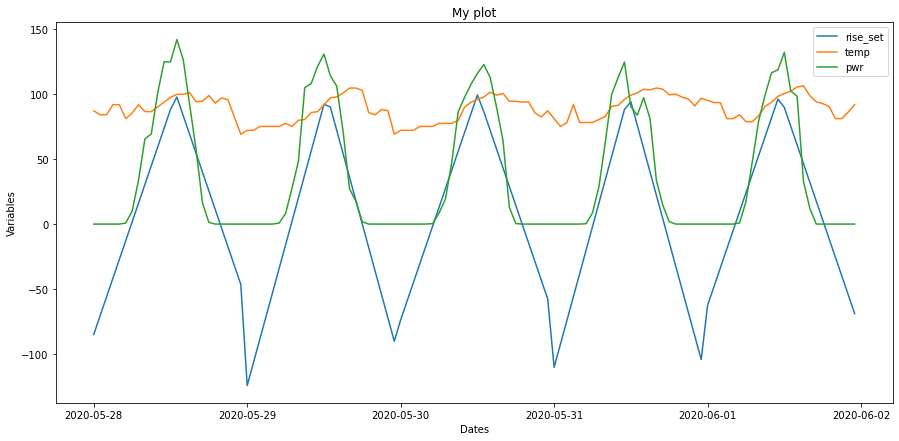

In [80]:
start = 24*100
end = 24*105
plt.figure(figsize = (15,7))
_ = plt.plot(data[start:end].index.values, data[start:end]["rise_set"].values*100, label='rise_set')
_ = plt.plot(data[start:end].index.values, data[start:end]["temp"].values*3, label='temp')
_ = plt.plot(data[start:end].index.values, data[start:end]["pwr"].values, label='pwr')

# set labels, legends and show plot
_ = plt.xlabel('Dates')
_ = plt.ylabel('Variables')
_ = plt.legend()
_ = plt.title('My plot')

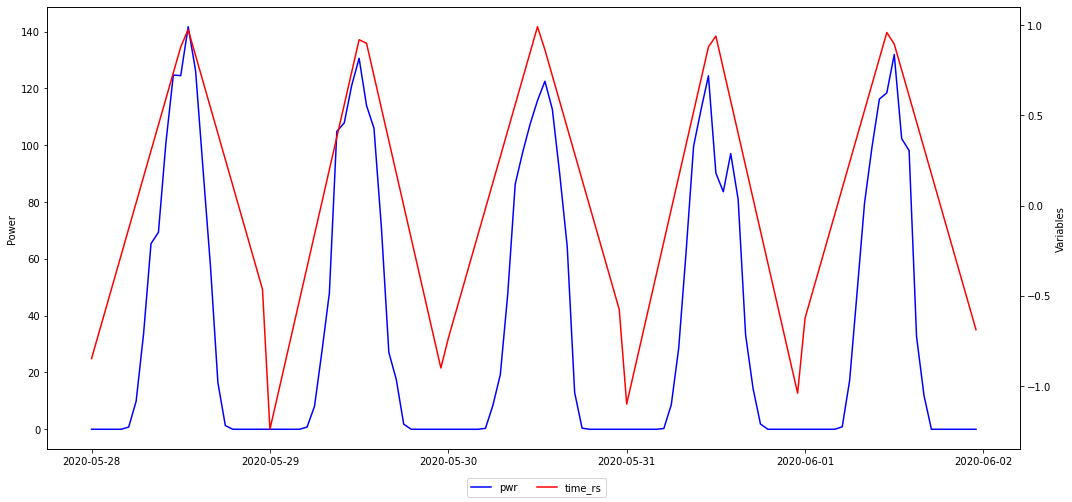

In [81]:
fig, ax1 = plt.subplots(figsize=(15,7))

ax1.set_ylabel('Power')  # we already handled the x-label with ax1
ax1.plot(data[start:end].index.values, data[start:end]["pwr"].values, label='pwr', color='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_xlabel('Date')
ax2.set_ylabel('Variables')
ax2.plot(data[start:end].index.values, data[start:end]["rise_set"].values, label='time_rs', color='red')

fig.tight_layout() 
fig.subplots_adjust(bottom=0.1)
fig.legend(labels=['pwr','time_rs'], loc="lower center", ncol=3)

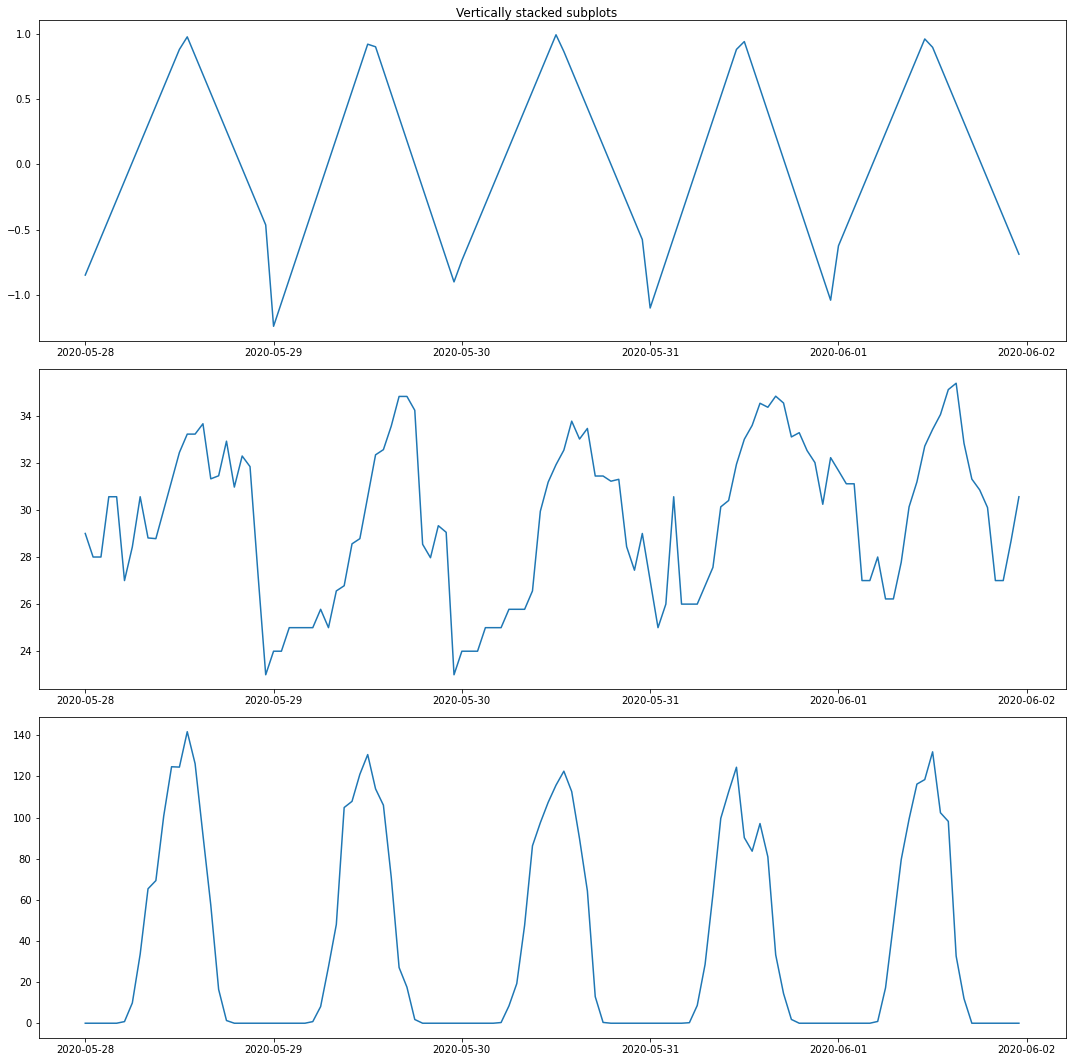

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,15))
fig.suptitle('Vertically stacked subplots')
ax1.plot(data[start:end].index.values, data[start:end]["rise_set"].values, label='time_rs')
ax2.plot(data[start:end].index.values, data[start:end]["temp"].values, label='temp')
ax3.plot(data[start:end].index.values, data[start:end]['pwr'].values, label='pwr')

fig.tight_layout() 

In [100]:
train_data = data[:int(data.shape[0]*0.7)]
test_data = data[int(data.shape[0]*0.7):]

print(train_data)
print(test_data)

                      temp  humidity  rain  cloud  visibility  rise_set  \
Dates                                                                     
2020-02-18 00:00:00  22.00      56.0   0.0    0.0        90.0     -1.06   
2020-02-18 01:00:00  21.00      56.0   0.0    0.0        90.0     -0.88   
2020-02-18 02:00:00  20.00      60.0   0.0    0.0        80.0     -0.70   
2020-02-18 03:00:00  19.00      63.0   0.0    0.0        80.0     -0.52   
2020-02-18 04:00:00  19.00      63.0   0.0    0.0        80.0     -0.34   
...                    ...       ...   ...    ...         ...       ...   
2020-08-15 16:00:00  26.00      88.0   0.0   40.0       100.0      0.40   
2020-08-15 17:00:00  26.00      88.0   0.0   75.0       100.0      0.22   
2020-08-15 18:00:00  26.22      88.0   0.0   75.0       100.0      0.04   
2020-08-15 19:00:00  26.00      88.0   0.0   75.0       100.0     -0.14   
2020-08-15 20:00:00  25.22      94.0   0.0   75.0       100.0     -0.32   

                        

In [98]:
float("1.2")

1.2

In [101]:
from sklearn.model_selection import train_test_split

In [109]:
data_X = data.drop('pwr', axis = 1)
data_Y = data.pwr

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=7)

In [110]:
X_train

,temp,humidity,rain,cloud,visibility,rise_set
Dates,,,,,,
2020-02-20 14:00:00,33.33,35.0,0.000,0.0,100.0,0.900
2020-08-28 10:00:00,29.00,79.0,0.000,20.0,100.0,0.680
2020-03-14 09:00:00,31.04,62.0,0.000,30.0,60.0,0.560
2020-08-26 06:00:00,25.09,81.0,0.000,98.0,100.0,-0.180
2020-08-17 20:00:00,27.22,94.0,0.000,75.0,90.0,-0.460
...,...,...,...,...,...,...
2020-10-12 11:00:00,24.22,83.0,0.560,75.0,90.0,0.760
2020-06-03 06:00:00,26.62,100.0,0.000,20.0,100.0,-0.060
2020-03-11 09:00:00,27.59,73.0,0.000,33.0,100.0,0.480
